## Importing libraries

In [303]:
import warnings
warnings.filterwarnings("ignore")

In [306]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random

In [307]:
random.seed(3116)

## Data Preprocessing

<p> Wine quality (red wine) dataset was loaded as required and the other sample dataset was created as per the requirements (uniform distribution with 𝜇 = 1, 𝜎 = 0.05).</p>

In [308]:
# Sample Dataset
mu = 1
sigma = 0.05
e = np.random.rand(100,1)

x = np.random.normal(mu, sigma, (100,1))
y = (1.3*(x**2)) + (4.8*x) + 8 + e

# Wine Quality Dataset
winequality_red = pd.read_csv('winequality-red.csv', sep = ';')

## Splitting Data into X train, Y train, X test, Y test

In [309]:
sample_train_x, sample_test_x, sample_train_y, sample_test_y = train_test_split(x, y, test_size = 0.2)

In [310]:
winequality_red_train_x, winequality_red_test_x, winequality_red_train_y, winequality_red_test_y = train_test_split(winequality_red.loc[:, winequality_red.columns != 'quality'], winequality_red[['quality']], test_size = 0.2)

## Data Normalization

In [311]:
winequality_red_train_x = normalize(winequality_red_train_x)
winequality_red_test_x = normalize(winequality_red_test_x)

## Function for 2-D Plotting

In [312]:
def plotting_data(alpha, train_RMSE, test_RMSE, title = 'RMSE(Train/Test) with Learning Rate Alpha', xlabel = 'Alpha', ylabel = 'RMSE'):
    plt.figure(figsize=(10,8))
    plt.plot(alpha, train_RMSE, 'ro', label = 'Train RMSE', color = 'black')
    plt.plot(alpha, test_RMSE, 'ro', label = 'Test RMSE', color = 'red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.show()

## Function for 3D Plotting

In [313]:
def plotting_3d_data(alpha, lamda, train_RMSE, test_RMSE, title):
    
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    for i, alpha in enumerate(alphas):
        for j, lamda in enumerate(lamdas):
            ax.scatter(xs=alphas[i], ys=lamdas[j], zs=train_RMSE[i,j],\
                       zdir='z', s=20, c='black', marker = 'o')
            ax.scatter(xs=alphas[i], ys=lamdas[j], zs=test_RMSE[i,j],\
                       zdir='z', s=20, c='red', marker = 'x')
   
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Lamda')
    ax.set_zlabel('RMSE')
    plt.legend(('Train_Data_RMSE','Test_Data_RMSE'))
    plt.title(title)
    plt.show()

## Function for Box PLot

In [314]:
def boxplot_data(score1, score2, score3, title = 'Box Plot for Training'):
    plt.figure(figsize=(10,8))
    box=plt.boxplot([score1, score2, score3],patch_artist=True)
    plt.xticks(np.arange(1, 4), ('OLS', 'Ridge', 'Lasso'))
    plt.ylabel("Cross Validation Value")
    plt.title(title)
    colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.show()

## Ordinary Least Squares
<p>For "Ordinary Least Squares", the following function was created. It is important to note that "SGDRegressor" has been used here from scikit learn as required with no "penalty" as we are implementing the model without regularization.</p>

In [315]:
def OLS(X_train, X_test, y_train, y_test, alphas, lamdas, epochs, epsilon=1e-3):
    train_RMSE = np.zeros((len(alphas), len(lamdas)))
    test_RMSE = np.zeros((len(alphas), len(lamdas)))

    for i in range(len(alphas)):
        for j in range(len(lamdas)):
            reg = SGDRegressor(loss = 'squared_loss', penalty= 'none', learning_rate= 'constant', eta0= alphas[i], max_iter=epochs, tol=epsilon)
                
            reg.fit(X_train, y_train.values.ravel())

            train_prediction = reg.predict(X_train)
            train_RMSE[i, j] = np.sqrt(mean_squared_error(y_train, train_prediction))

            test_prediction = reg.predict(X_test)
            test_RMSE[i, j] = np.sqrt(mean_squared_error(y_test, test_prediction))
    
    return train_RMSE, test_RMSE

## Ridge Regression

<p>For "Ridge Regression", the parameter penalty is altered (L2 regularization added) in the function below.</p>

In [316]:
def RidgeRegression(X_train, X_test, y_train, y_test, alphas, lamdas, epochs, epsilon=1e-3):
    train_RMSE = np.zeros((len(alphas), len(lamdas)))
    test_RMSE = np.zeros((len(alphas), len(lamdas)))
    a = []

    for i in range(len(alphas)):
        for j in range(len(lamdas)):
            reg = SGDRegressor(loss = 'squared_loss', penalty= 'l2', learning_rate= 'constant', eta0= alphas[i], alpha= lamdas[j], max_iter=epochs, tol=epsilon)
                
            reg.fit(X_train, y_train.values.ravel())

            train_prediction = reg.predict(X_train)
            train_RMSE[i, j] = np.sqrt(mean_squared_error(y_train, train_prediction))

            test_prediction = reg.predict(X_test)
            test_RMSE[i, j] = np.sqrt(mean_squared_error(y_test, test_prediction))
            
            #print('Train RMSE {}, Test RMSE {}, for alpha {}, lambda {}'.format(train_RMSE, test_RMSE, alphas[i], lamdas[j]))
    
    return train_RMSE, test_RMSE

## Lasso Regression

<p>For "Lasso Regression", the parameter penalty is altered (L1 regularization added).</p>

In [317]:
def LassoRegression(X_train, X_test, y_train, y_test, alphas, lamdas, epochs, epsilon=1e-3):
    train_RMSE = np.zeros((len(alphas), len(lamdas)))
    test_RMSE = np.zeros((len(alphas), len(lamdas)))
    a = []

    for i in range(len(alphas)):
        for j in range(len(lamdas)):
            reg = SGDRegressor(loss = 'squared_loss', penalty= 'l1', learning_rate= 'constant', eta0= alphas[i], alpha= lamdas[j], max_iter=epochs, tol=epsilon)
            reg.fit(X_train, y_train.values.ravel())

            train_prediction = reg.predict(X_train)
            train_RMSE[i, j] = np.sqrt(mean_squared_error(y_train, train_prediction))

            test_prediction = reg.predict(X_test)
            test_RMSE[i, j] = np.sqrt(mean_squared_error(y_test, test_prediction))
            
            #print('Train RMSE {}, Test RMSE {}, for alpha {}, lambda {}'.format(train_RMSE, test_RMSE, alphas[i], lamdas[j]))
    
    return train_RMSE, test_RMSE

## Models without Cross Validation and Grid Search

### 1) OLS

In [318]:
alphas = [1e-01, 1e-03, 1e-05]
lamdas = [1e-02, 1e-04, 1e-06]

# lamda = 0 due to no regularization
train_RMSE_OLS, test_RMSE_OLS = OLS(winequality_red_train_x, winequality_red_test_x, winequality_red_train_y, winequality_red_test_y, alphas, [0] , 1000)

In [319]:
train_RMSE_OLS

array([[0.76467553],
       [0.78293783],
       [0.82520546]])

In [320]:
test_RMSE_OLS

array([[0.77902475],
       [0.81087329],
       [0.86213033]])

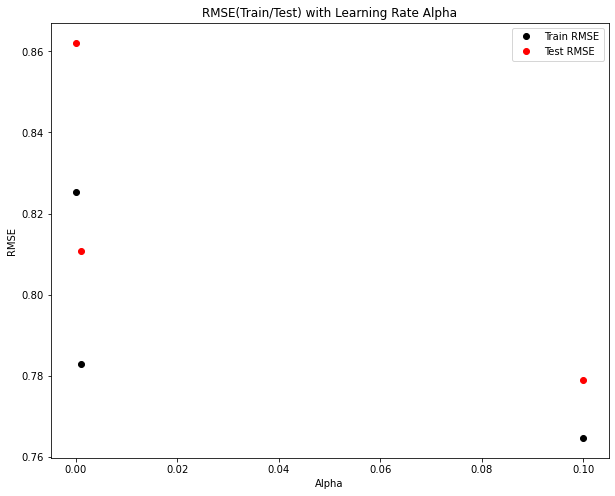

In [321]:
plotting_data(alphas, train_RMSE_OLS, test_RMSE_OLS)

### 2) Ridge regression

In [322]:
train_RMSE_Ridge, test_RMSE_Ridge = RidgeRegression(winequality_red_train_x, winequality_red_test_x, winequality_red_train_y, winequality_red_test_y, alphas, lamdas, 1000)

In [323]:
train_RMSE_Ridge

array([[0.8188366 , 0.77529801, 0.70380579],
       [0.78516111, 0.78340081, 0.78466188],
       [0.82678865, 0.82522635, 0.82520357]])

In [324]:
test_RMSE_Ridge

array([[0.85495608, 0.78980795, 0.71047325],
       [0.81500172, 0.8128516 , 0.81405473],
       [0.86381272, 0.86215267, 0.86212831]])

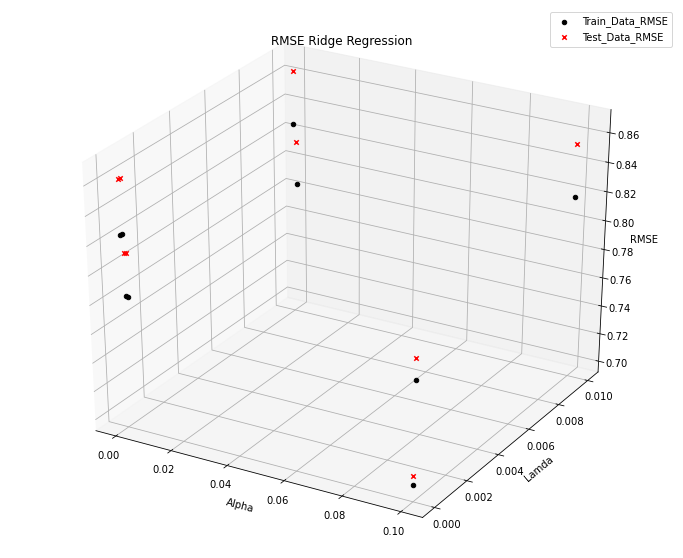

In [325]:
plotting_3d_data(alphas, lamdas ,train_RMSE_Ridge, test_RMSE_Ridge, 'RMSE Ridge Regression')

### 3) Lasso regression

In [326]:
train_RMSE_Lasso, test_RMSE_Lasso = LassoRegression(winequality_red_train_x, winequality_red_test_x, winequality_red_train_y, winequality_red_test_y, alphas, lamdas, 1000)

In [327]:
train_RMSE_Lasso

array([[0.79173341, 0.70157485, 0.71158812],
       [0.78825018, 0.78344963, 0.78411939],
       [0.82743001, 0.82523949, 0.82520226]])

In [328]:
test_RMSE_Lasso

array([[0.82772023, 0.71015623, 0.72418505],
       [0.81804425, 0.81208646, 0.81272823],
       [0.86448874, 0.86216658, 0.86212699]])

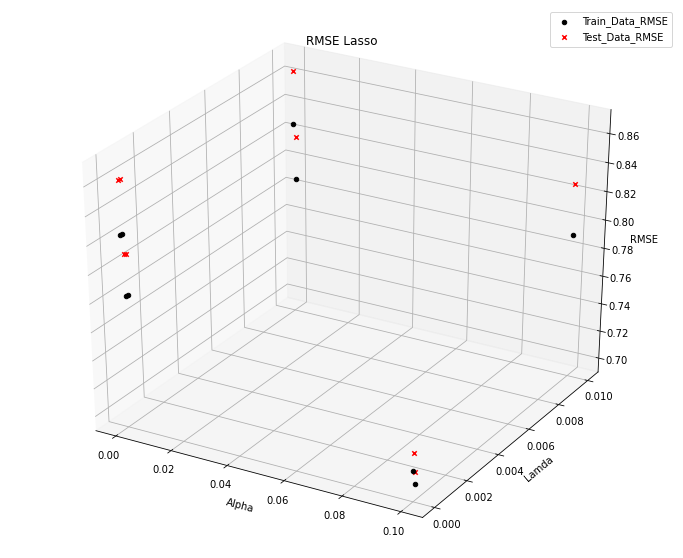

In [329]:
plotting_3d_data(alphas, lamdas ,train_RMSE_Lasso, test_RMSE_Lasso, 'RMSE Lasso')

<p>By comparing the train and test RMSE, we can say that ridge and lasso models are performing
comparatively better than ordinary least squares, due to regularization terms, the model is not
overfitting. As seen clearly in the first graph, training error is low and the testing error is high which
shows that the model is overfitting. While in the second plot (L2 regularization), the train error is
higher than the test error. In the third plot, both the train and test error are high with test error being
higher than the train error which indicates chances of underfitting. As per the analysis, ridge regression
has the best performance among all three models.</p>

## Models with Cross Validation and Grid Search (Hyperparameter Tuning)

<p>In this part, hyperparameters 𝛼 and 𝜆 are tuned using "GridSearchCV" from scikit learn</p>

### OLS with Hyper Parameter Tuning Using Grid Search
<p>The parameters in the below snippet are same as used in the previous part for OLS (Ordinary Least Squares) with penalty as <b>None</b> due to no regularization term. The cross-validation is plotted against the learning rate and the following result is obtained for OLS:</p>

In [330]:
parameters = {
    'loss': ['squared_loss'],
    'penalty': ['none'],
    'learning_rate': ['constant'],
    'eta0': 10.0 ** -np.arange(1, 7),
}

model = SGDRegressor(max_iter = 10000, tol = 1e-3)

ols = GridSearchCV(model, parameters, cv = 5,return_train_score=True)
ols.fit(winequality_red_train_x, winequality_red_train_y.values.ravel())

print("Best Value: " + str(ols.best_score_))

Best Value: 0.08957347840289616


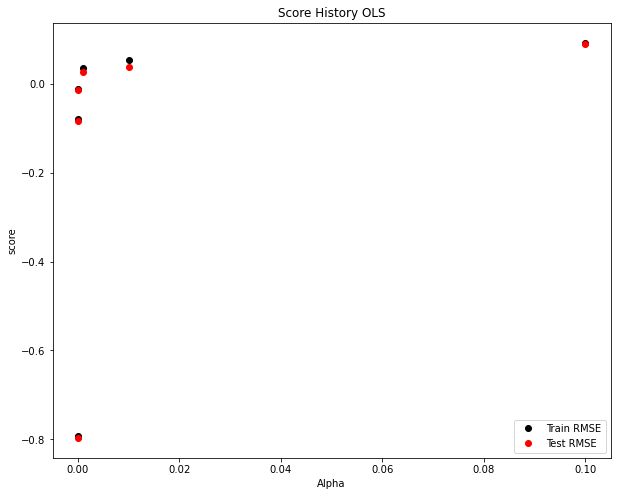

In [331]:
a = np.ma.getdata(ols.cv_results_['param_eta0'])
b = ols.cv_results_['mean_train_score']
c = ols.cv_results_['mean_test_score']

plotting_data(a, b ,c, title='Score History OLS', ylabel='score')

### Ridge Regression with Hyper Parameter Tuning Using Grid Search
<p>For "Ridge Regression", the parameters in the above code snippet are altered in order to add L2
regularization. The following results are obtained for ridge regression:</p>

In [332]:
parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss'],
    'penalty': ['l2'],
    'learning_rate': ['constant'],
    'eta0': 10.0 ** -np.arange(1, 7),
}

# Establish a model
model = SGDRegressor(max_iter = 10000, tol = 1e-3)

ridge_regression = GridSearchCV(model, parameters, cv = 5,return_train_score=True)
ridge_regression.fit(winequality_red_train_x, winequality_red_train_y.values.ravel())

print("Best Value: " + str(ridge_regression.best_score_))

Best Value: 0.05642043766320419


In [333]:
a = np.ma.getdata(ridge_regression.cv_results_['param_eta0'])
b = np.ma.getdata(ridge_regression.cv_results_['param_alpha'])
c = ridge_regression.cv_results_['mean_train_score'].reshape(6,6)
d = ridge_regression.cv_results_['mean_test_score'].reshape(6,6)

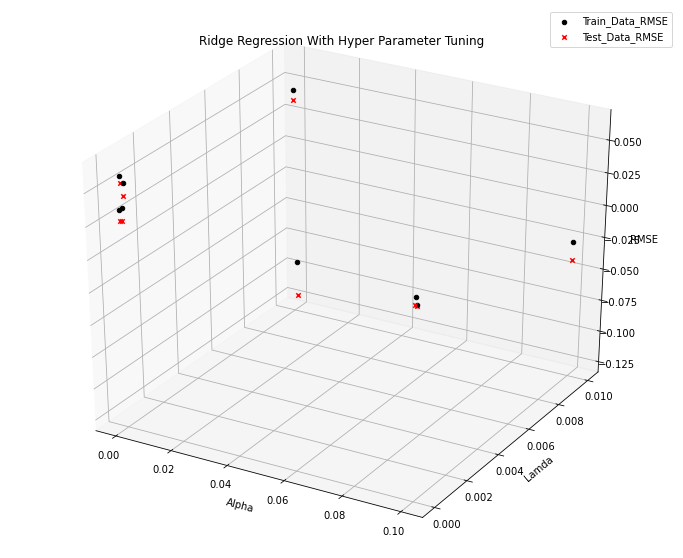

In [334]:
plotting_3d_data(a, b ,c, d, "Ridge Regression With Hyper Parameter Tuning")

### Lasso Regression with Hyper Parameter Tuning Using Grid Search
<p>For "Lasso Regression", the parameters in the above code snippet are altered in order to add L1 regularization. The
following results are obtained for lasso regression:</p>

In [335]:
parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss'],
    'penalty': ['l1'],
    'learning_rate': ['constant'],
    'eta0': 10.0 ** -np.arange(1, 7),
}

model = SGDRegressor(max_iter = 10000, tol = 1e-3)

lasso = GridSearchCV(model, parameters, cv = 5,return_train_score=True)
lasso.fit(winequality_red_train_x, winequality_red_train_y.values.ravel())

print("Best Value: " + str(lasso.best_score_))

Best Value: 0.0588126929695594


In [336]:
e = np.ma.getdata(lasso.cv_results_['param_eta0'])
f = np.ma.getdata(lasso.cv_results_['param_alpha'])
g = lasso.cv_results_['mean_train_score'].reshape(6,6)
h = lasso.cv_results_['mean_test_score'].reshape(6,6)

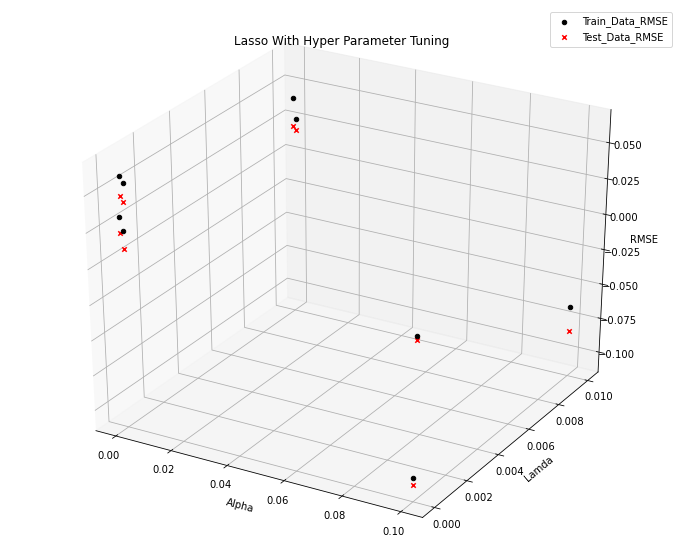

In [337]:
plotting_3d_data(e, f ,g, h, "Lasso With Hyper Parameter Tuning")

## Evaluation of the models using Cross Validation Score with Optimal Parameters

<p>The best parameters for each model from the grid search are recorded using ‘model.best_params_’ and
then used for calculating the cross validation score in order to evaluate each model using the following
code snippet:</p>

### OLS with optimal hyperparameters

In [338]:

features, labels = winequality_red_train_x, winequality_red_train_y
test_features, test_labels = winequality_red_test_x, winequality_red_test_y

best_alpha_OLS = ols.best_params_['eta0']

model_opt_OLS = SGDRegressor(penalty='none', learning_rate='constant', eta0=best_alpha_OLS, max_iter=1000, tol=1e-3)
model_opt_OLS.fit(features, labels.values.ravel())
y_hat = model_opt_OLS.predict(features)
train_rmse = mean_squared_error(labels, y_hat)
y_hat_test = model_opt_OLS.predict(test_features)
test_rmse = mean_squared_error(test_labels, y_hat_test)

print('Train RMSE {}, Test RMSE {}, for alpha {}'.format(train_rmse, test_rmse, best_alpha_OLS))

cv_train1 = cross_val_score(model_opt_OLS, features, labels.values.ravel(), cv=5)
print('Cross validation score for train data: {}'.format(cv_train1))

cv_test1 = cross_val_score(model_opt_OLS, test_features, test_labels.values.ravel(), cv=5)
print('Cross validation score for test data: {}'.format(cv_test1))

Train RMSE 0.48615907242162465, Test RMSE 0.49465214064514795, for alpha 0.1
Cross validation score for train data: [0.11716883 0.18143531 0.18649426 0.03169235 0.04105481]
Cross validation score for test data: [ 0.04937526  0.05885     0.0668872   0.13420033 -0.0026891 ]


#### The parameter ‘penalty’ would be L2 for ridge regression and L1 for lasso regression.

## Ridge regression with optimal hyperparameters

In [339]:
best_alpha_ridge = ridge_regression.best_params_['eta0']
best_lamda_ridge = ridge_regression.best_params_['alpha']

model_opt_ridge = SGDRegressor(penalty='l2', alpha=best_lamda_ridge, learning_rate='constant', eta0=best_alpha_ridge, max_iter=1000, tol=1e-3)
model_opt_ridge.fit(features, labels.values.ravel())
train_prediction_ridge = model_opt_ridge.predict(features)
train_rmse_ridge = mean_squared_error(labels, train_prediction_ridge)
test_prediction_ridge = model_opt_ridge.predict(test_features)
test_rmse_ridge = mean_squared_error(test_labels, test_prediction_ridge)

print('Train RMSE {}, Test RMSE {}, for alpha {}, lambda {}'.format(train_rmse_ridge, test_rmse_ridge, best_alpha_ridge, best_lamda_ridge))

cv_train2 = cross_val_score(model_opt_ridge, features, labels.values.ravel(), cv=5)
print('Cross validation score for train data: {}'.format(cv_train2))

cv_test2 = cross_val_score(model_opt_ridge, test_features, test_labels.values.ravel(), cv=5)
print('Cross validation score for test data: {}'.format(cv_test2))

Train RMSE 0.6705434352519865, Test RMSE 0.6879417626222415, for alpha 0.1, lambda 0.0001
Cross validation score for train data: [ 0.11094116  0.03226638  0.06975012  0.01955148 -0.06101926]
Cross validation score for test data: [-0.04411145 -0.2985226  -0.14916129  0.04017539 -0.13732563]


## Lasso regression with optimal hyperparameters

In [340]:
best_alpha_lasso = lasso.best_params_['eta0']
best_lamda_lasso = lasso.best_params_['alpha']

model_opt_lasso = SGDRegressor(penalty='l1', alpha=best_lamda_lasso, learning_rate='constant', eta0=best_alpha_lasso, max_iter=10000, tol=1e-3)
model_opt_lasso.fit(features, labels.values.ravel())
train_prediction_lasso = model_opt_lasso.predict(features)
train_rmse_lasso = mean_squared_error(labels, train_prediction_lasso)
test_prediction_lasso = model_opt_lasso.predict(test_features)
test_rmse_lasso = mean_squared_error(test_labels, test_prediction_lasso)

print('Train RMSE {}, Test RMSE {}, for alpha {}, lambda {}'.format(train_rmse_lasso, test_rmse_lasso, best_alpha_lasso, best_lamda_lasso))

cv_train3 = cross_val_score(model_opt_lasso, features, labels.values.ravel(), cv=5)
print('Cross validation score for train data: {}'.format(cv_train3))

cv_test3 = cross_val_score(model_opt_lasso, test_features, test_labels.values.ravel(), cv=5)
print('Cross validation score for test data: {}'.format(cv_test3))

Train RMSE 0.5898663037926865, Test RMSE 0.6232775936394811, for alpha 0.1, lambda 0.0001
Cross validation score for train data: [ 0.0572409   0.09779242  0.08377367 -0.18927492 -0.06077447]
Cross validation score for test data: [-0.10936477  0.02490218  0.03983637  0.08682162 -0.23497761]


## Box plots are plotted for the evaluation on training and test data for each model and the following results are obtained:

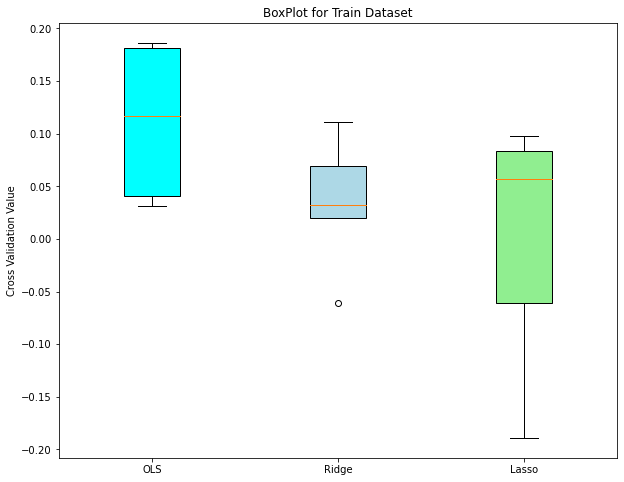

In [343]:
boxplot_data(cv_train1, cv_train2, cv_train3, title = 'BoxPlot for Train Dataset')

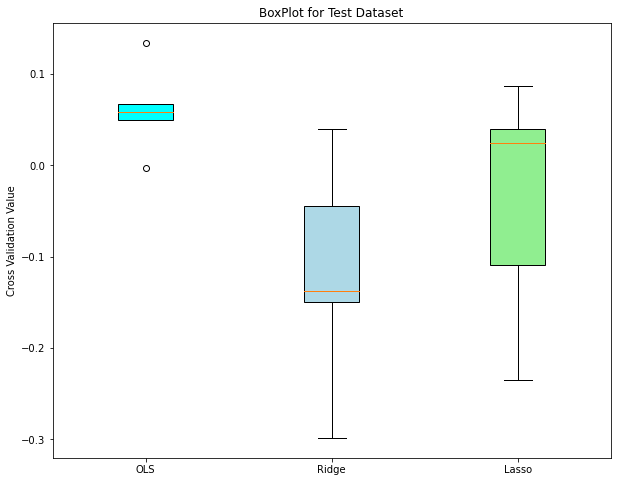

In [344]:
boxplot_data(cv_test1, cv_test2, cv_test3, title = 'BoxPlot for Test Dataset')

<p>The analysis of the above plot shows that, for training set OLS has the best performance probably because the model is overfitting. However, for test set both ridge and lasso have better performance than OLS due to regularization (ridge regression having the best performance).</p>

## Exercise 2: Higher Order Polynomial Regression
<p>For generating polynomial features from the sample data that was created in the beginning, scikit
learn’s <b>"preprocessing.PolynomialFeatures"</b> is used.</p>

### Task A: Prediction with high degree of polynomials
<p>The following code snippet implements linear regression on each of the created datasets (polynomials with different degrees):</p>

In [345]:
X_D1, Y_D1 = x, y
p1 = PolynomialFeatures(1).fit_transform(X_D1, Y_D1)
r1 = LinearRegression().fit(p1, Y_D1)
Y1 = r1.predict(p1)
o1 = sorted(zip(X_D1,Y1))

p2 = PolynomialFeatures(2).fit_transform(X_D1, Y_D1)
r2 = LinearRegression().fit(p2, Y_D1)
Y2 = r2.predict(p2)
o2 = sorted(zip(X_D1,Y2))

p3 = PolynomialFeatures(7).fit_transform(X_D1, Y_D1)
r3 = LinearRegression().fit(p3, Y_D1)
Y3 = r3.predict(p3)
o3 = sorted(zip(X_D1,Y3))

p4 = PolynomialFeatures(10).fit_transform(X_D1, Y_D1)
r4 = LinearRegression().fit(p4, Y_D1)
Y4 = r4.predict(p4)
o4 = sorted(zip(X_D1,Y4))

p5 = PolynomialFeatures(16).fit_transform(X_D1, Y_D1)
r5 = LinearRegression().fit(p5, Y_D1)
Y5 = r5.predict(p5)
o5 = sorted(zip(X_D1,Y5))

p6 = PolynomialFeatures(100).fit_transform(X_D1, Y_D1)
r6 = LinearRegression().fit(p6, Y_D1)
Y6 = r6.predict(p6)
o6 = sorted(zip(X_D1,Y6))

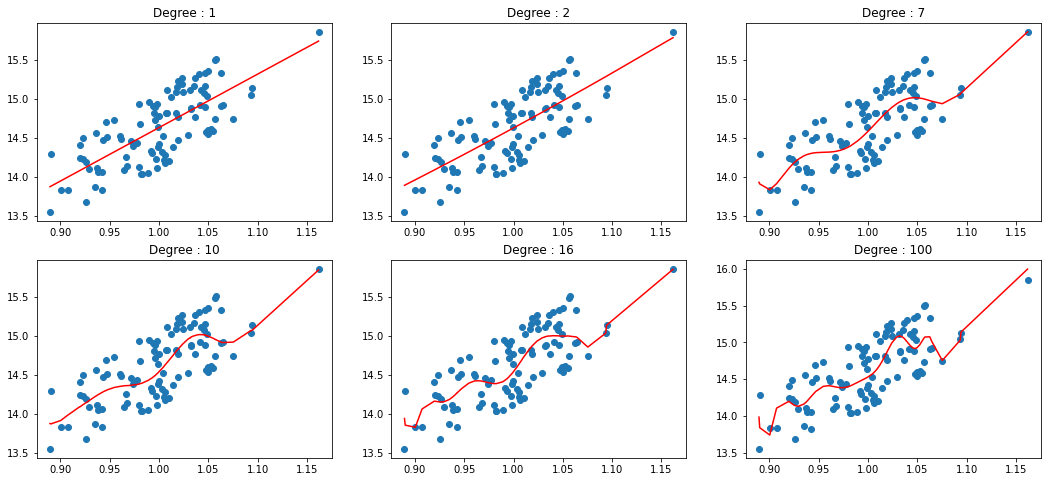

In [346]:
plt.figure(figsize=(18,8))

plt.subplot(2, 3, 1)
plt.scatter(X_D1, Y_D1)
plt.plot([x[0] for x in o1], [x[1] for x in o1], color= "red")
plt.title("Degree : 1")

plt.subplot(2, 3, 2)
plt.scatter(X_D1, Y_D1)
plt.plot([x[0] for x in o2], [x[1] for x in o2], color= "red")
plt.title("Degree : 2")

plt.subplot(2, 3, 3)
plt.scatter(X_D1, Y_D1)
plt.plot([x[0] for x in o3], [x[1] for x in o3], color= "red")
plt.title("Degree : 7")

plt.subplot(2, 3, 4)
plt.scatter(X_D1, Y_D1)
plt.plot([x[0] for x in o4], [x[1] for x in o4], color= "red")
plt.title("Degree : 10")

plt.subplot(2, 3, 5)
plt.scatter(X_D1, Y_D1)
plt.plot([x[0] for x in o5], [x[1] for x in o5], color= "red")
plt.title("Degree : 16")

plt.subplot(2, 3, 6)
plt.scatter(X_D1, Y_D1)
plt.plot([x[0] for x in o6], [x[1] for x in o6], color= "red")
plt.title("Degree : 100")

plt.show()

<p><b>In the above plot, it is clear that when degree of the polynomial is 1 a straight line is observed which indicates that the model is underfitting and fails to predict any features. Whereas, with increasing degree of the polynomial, the regression line is overfitting.</b></p>

### Task B: Effect of Regularization
<p>In this part the above is implemented with regularization and fixed degree of polynomial (10). The following code snippet is used:</p>

In [347]:
p1 = PolynomialFeatures(10).fit_transform(X_D1, Y_D1)
r1 = Ridge(alpha=0).fit(p1, Y_D1)
Y1 = r1.predict(p1)
o1 = sorted(zip(X_D1,Y1))

p2 = PolynomialFeatures(10).fit_transform(X_D1, Y_D1)
r2 = Ridge(alpha=10**-6).fit(p2, Y_D1)
Y2 = r2.predict(p2)
o2 = sorted(zip(X_D1,Y2))

p3 = PolynomialFeatures(10).fit_transform(X_D1, Y_D1)
r3 = Ridge(alpha=10**-2).fit(p3, Y_D1)
Y3 = r3.predict(p3)
o3 = sorted(zip(X_D1,Y3))

p4 = PolynomialFeatures(10).fit_transform(X_D1, Y_D1)
r4 = Ridge(alpha=1).fit(p4, Y_D1)
Y4 = r4.predict(p4)
o4 = sorted(zip(X_D1,Y4))

Text(0.5, 1.0, 'Value = 1')

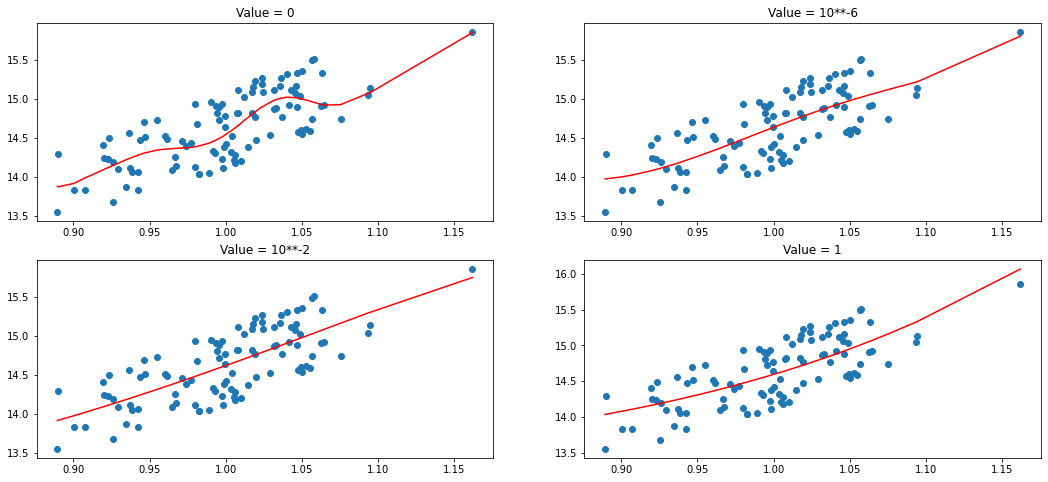

In [348]:
plt.figure(figsize=(18,8))

plt.subplot(2, 2, 1)
plt.scatter(X_D1, Y_D1)
plt.plot([x[0] for x in o1], [x[1] for x in o1], color= "red")
plt.title("Value = 0")

plt.subplot(2, 2, 2)
plt.scatter(X_D1, Y_D1)
plt.plot([x[0] for x in o2], [x[1] for x in o2], color= "red")
plt.title("Value = 10**-6")

plt.subplot(2, 2, 3)
plt.scatter(X_D1, Y_D1)
plt.plot([x[0] for x in o3], [x[1] for x in o3], color= "red")
plt.title("Value = 10**-2")

plt.subplot(2, 2, 4)
plt.scatter(X_D1, Y_D1)
plt.plot([x[0] for x in o4], [x[1] for x in o4], color= "red")
plt.title("Value = 1")

#### Increasing the value of 𝜆 we are penalizing the abrupt changes in the weights more aggressively (values are far apart). The model is overfit for 𝜆 = 0. The regularization then counters overfitting. An optimal value of 𝜆 is required for obtaining minimum error on test prediction.

## Exercise 3: Implementing Coordinate Descent 

### Reading Dataset

In [349]:
winequality_red1 = pd.read_csv('winequality-red.csv', sep = ';')

In [350]:
winequality_red1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Train/Test Split

In [351]:
winequality_red1_train_x, winequality_red1_test_x, winequality_red1_train_y, winequality_red1_test_y = train_test_split(winequality_red1.loc[:, winequality_red1.columns != 'quality'], winequality_red1[['quality']], test_size = 0.2)

### Adding Bias

In [352]:
winequality_red1_train_x.insert(0,'bias',np.ones((winequality_red1_train_x.shape[0],1)))

In [353]:
winequality_red1_train_x.head()

,bias,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
285,1.0,9.9,0.59,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8
153,1.0,7.5,0.60,0.03,1.8,0.095,25.0,99.0,0.99500,3.35,0.54,10.1
199,1.0,6.9,1.09,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4
973,1.0,8.5,0.34,0.44,1.7,0.079,6.0,12.0,0.99605,3.52,0.63,10.7
362,1.0,11.9,0.58,0.66,2.5,0.072,6.0,37.0,0.99920,3.05,0.56,10.0


In [354]:
#defining X data

winequality_red1_train_x = np.array(winequality_red1_train_x)
winequality_red1_test_x = np.array(winequality_red1_test_x)

#defining Y data
winequality_red1_train_y =winequality_red1_train_y.values
winequality_red1_test_y =winequality_red1_test_y.values


### Coordinate Descent

In [355]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [356]:
def gradient(x_data, y_data,beta):
    row,col = x_data.shape
    for i in range(col):
        data_minus_m = np.delete(x_data, i, axis=1)
        beta_minus_m = np.delete(beta, i)
        col_m = np.array(column(x_data,i))
        numerator = np.dot((y_data.T-np.dot(data_minus_m,beta_minus_m)),col_m)
        a.reshape(-1)
        denominator = col_m.T.dot(col_m)
        beta[i] = numerator/denominator
    return beta

In [357]:
def cordinate_descent(X_data, Y_data):
    betas = np.zeros((X_data.shape[1], 1))
   
    beta_0 = np.array(np.zeros(100))
    beta_1 = np.array(np.zeros(100))
    beta_2 = np.array(np.zeros(100))
    beta_3 = np.array(np.zeros(100))
    beta_4 = np.array(np.zeros(100))
    beta_5 = np.array(np.zeros(100))
    beta_6 = np.array(np.zeros(100))
    beta_7 = np.array(np.zeros(100))
    beta_8 = np.array(np.zeros(100))
    beta_9 = np.array(np.zeros(100))
    beta_10 = np.array(np.zeros(100))
    beta_11 = np.array(np.zeros(100))
    
    for i in range(100):
        oldLoss = np.sum(np.square(Y_data.T - np.dot(X_data, betas))) 
        betas = gradient(X_data, Y_data ,betas)
        beta_0[i] = betas[0]
        beta_1[i] = betas[1]
        beta_2[i] = betas[2]
        beta_3[i] = betas[3]
        beta_4[i] = betas[4]
        beta_5[i] = betas[5]
        beta_6[i] = betas[6]
        beta_7[i] = betas[7]
        beta_8[i] = betas[8]
        beta_9[i] = betas[9]
        beta_10[i] = betas[10]
        beta_11[i] = betas[11]
        
        newLoss = np.sum(np.square(Y_data.T - np.dot(X_data, betas))) 
        
        if np.abs(newLoss - oldLoss) < 0.000001: 
            break
    
    plt.figure(figsize=(12,8))
    plt.plot(beta_0,label ="beta_0") 
    plt.plot(beta_1,label ="beta_1")
    plt.plot(beta_2,label ="beta_2")
    plt.plot(beta_3,label ="beta_3")
    plt.plot(beta_4,label ="beta_4")
    plt.plot(beta_5,label ="beta_5")
    plt.plot(beta_6,label ="beta_6")
    plt.plot(beta_7,label ="beta_7")
    plt.plot(beta_8,label ="beta_8")
    plt.plot(beta_9,label ="beta_9")
    plt.plot(beta_10,label ="beta_10")
    plt.plot(beta_11,label ="beta_11")
    plt.xlabel("Epochs")
    plt.ylabel('Values')
    plt.ylabel("Without Regularization")
    plt.legend()

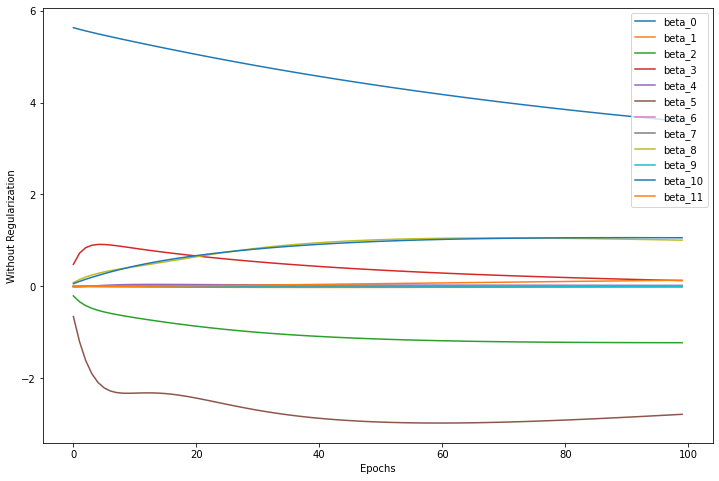

In [358]:
cordinate_descent(winequality_red1_train_x, winequality_red1_train_y)

### Coordinate Descent with L1 Regularization

In [359]:
def soft_threshold(x_data,y_data,beta,lamda):
    m,n = x_data.shape
    a1 = np.array(np.zeros(n))
    a1 = gradient(x_data, y_data ,beta)
    thresh = threshold(x_data,lamda)
    for i in range(n):
        if np.absolute(a1[i]) <= thresh[i]:
            a1[i] = 0
        elif a1[i] > thresh[i]:
            a1[i] = a1[i] - thresh[i]
        elif a1[i] < (-1)*thresh[i]:
            a1[i] = a1[i] + thresh[i]
        else:
            raise Exception("Exception")
    return a1

In [360]:
def Cordinate_Descent_L1(X_data, Y_data, lamda, num):
    betas = np.zeros((X_data.shape[1], 1))
    beta1_0 = np.array(np.zeros(num))
    beta1_1 = np.array(np.zeros(num))
    beta1_2 = np.array(np.zeros(num))
    beta1_3 = np.array(np.zeros(num))
    beta1_4 = np.array(np.zeros(num))
    beta1_5 = np.array(np.zeros(num))
    beta1_6 = np.array(np.zeros(num))
    beta1_7 = np.array(np.zeros(num))
    beta1_8 = np.array(np.zeros(num))
    beta1_9 = np.array(np.zeros(num))
    beta1_10 = np.array(np.zeros(num))
    beta1_11 = np.array(np.zeros(num))
    
    for i in range(num):
        oldLoss = np.sum(np.square(Y_data.T - np.dot(X_data, betas)))+ lamda*np.absolute(sum(betas))
        betas = soft_threshold(X_data, Y_data ,betas,lamda)
        beta1_0[i] = betas[0] 
        beta1_1[i] = betas[1]
        beta1_2[i] = betas[2]
        beta1_3[i] = betas[3]
        beta1_4[i] = betas[4]
        beta1_5[i] = betas[5]
        beta1_6[i] = betas[6]
        beta1_7[i] = betas[7]
        beta1_8[i] = betas[8]
        beta1_9[i] = betas[9]
        beta1_10[i] = betas[10]
        beta1_11[i] = betas[11]
        
        newLoss = np.sum(np.square(Y_data.T - np.dot(X_data, betas)))+ lamda*np.absolute(sum(betas))
        
        if np.abs(newLoss - oldLoss) < 0.000001: 
            break
            
    plt.figure(figsize=(12,8))
    plt.plot(beta1_0,label ="beta_0") 
    plt.plot(beta1_1,label ="beta_1")
    plt.plot(beta1_2,label ="beta_2")
    plt.plot(beta1_3,label ="beta_3")
    plt.plot(beta1_4,label ="beta_4")
    plt.plot(beta1_5,label ="beta_5")
    plt.plot(beta1_6,label ="beta_6")
    plt.plot(beta1_7,label ="beta_7")
    plt.plot(beta1_8,label ="beta_8")
    plt.plot(beta1_9,label ="beta_9")
    plt.plot(beta1_10,label ="beta_10")
    plt.plot(beta1_11,label ="beta_11")
    plt.xlabel("Epochs")
    plt.ylabel('Values')
    plt.ylabel("With Regularization")
    plt.legend()

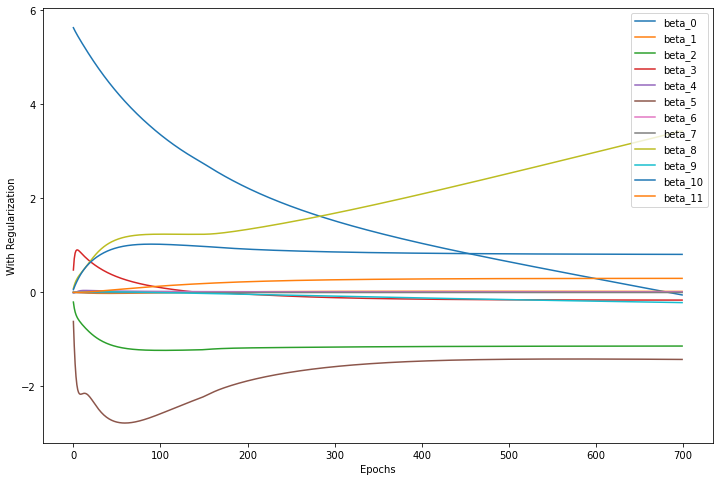

In [361]:
Cordinate_Descent_L1(winequality_red1_train_x, winequality_red1_train_y,1,700)

#### With regularization the most of the Betas are clearly converging to zero even those that were not without regularization